In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
import tensorflow as tf

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.layers import Dropout
from scikeras.wrappers import KerasClassifier

Load the dataset

In [2]:
df = loadtxt('data_oversampled.csv',skiprows = 1, delimiter=',')

Splitting the dataset

In [3]:
# split into input (X) and output (y) variables
x = df[:,0:4]
y = df[:,4]

Standardisation

In [4]:
#Train, Test and Split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

Build the Keras Model with different epochs/batch sizes

In [44]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 2 hidden layers, #Increase Dropout and BatchNomarlisation layers
# Powers of 2, Larger decrements (256-256-8)
# define the keras model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model = Sequential()

model.add(Dense(256, input_dim=4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=250, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()


Epoch 1/250
42/42 [==============================] - 3s 11ms/step - loss: 0.6505 - accuracy: 0.6733 - val_loss: 0.6251 - val_accuracy: 0.6864
Epoch 2/250
42/42 [==============================] - 0s 4ms/step - loss: 0.5795 - accuracy: 0.7112 - val_loss: 0.6068 - val_accuracy: 0.7045
Epoch 3/250
42/42 [==============================] - 0s 4ms/step - loss: 0.5331 - accuracy: 0.7538 - val_loss: 0.5950 - val_accuracy: 0.6955
Epoch 4/250
42/42 [==============================] - 0s 5ms/step - loss: 0.5201 - accuracy: 0.7492 - val_loss: 0.5776 - val_accuracy: 0.7227
Epoch 5/250
42/42 [==============================] - 0s 4ms/step - loss: 0.5643 - accuracy: 0.7219 - val_loss: 0.5630 - val_accuracy: 0.7318
Epoch 6/250
42/42 [==============================] - 0s 4ms/step - loss: 0.5306 - accuracy: 0.7447 - val_loss: 0.5520 - val_accuracy: 0.7273
Epoch 7/250
42/42 [==============================] - 0s 4ms/step - loss: 0.5333 - accuracy: 0.7432 - val_loss: 0.5355 - val_accuracy: 0.7273
Epoch 8/250


Epoch 59/250
42/42 [==============================] - 0s 4ms/step - loss: 0.4736 - accuracy: 0.8055 - val_loss: 0.4639 - val_accuracy: 0.7591
Epoch 60/250
42/42 [==============================] - 0s 4ms/step - loss: 0.4487 - accuracy: 0.8146 - val_loss: 0.4619 - val_accuracy: 0.7545
Epoch 61/250
42/42 [==============================] - 0s 4ms/step - loss: 0.4762 - accuracy: 0.8085 - val_loss: 0.4752 - val_accuracy: 0.7545
Epoch 62/250
42/42 [==============================] - 0s 4ms/step - loss: 0.4757 - accuracy: 0.7933 - val_loss: 0.4600 - val_accuracy: 0.7682
Epoch 63/250
42/42 [==============================] - 0s 4ms/step - loss: 0.4632 - accuracy: 0.7979 - val_loss: 0.4585 - val_accuracy: 0.7727
Epoch 64/250
42/42 [==============================] - 0s 4ms/step - loss: 0.4656 - accuracy: 0.7918 - val_loss: 0.4604 - val_accuracy: 0.7773
Epoch 65/250
42/42 [==============================] - 0s 4ms/step - loss: 0.4601 - accuracy: 0.8024 - val_loss: 0.4646 - val_accuracy: 0.7682
Epoch 

42/42 [==============================] - 0s 4ms/step - loss: 0.4285 - accuracy: 0.8131 - val_loss: 0.4334 - val_accuracy: 0.7864
Epoch 174/250
42/42 [==============================] - 0s 4ms/step - loss: 0.4516 - accuracy: 0.8176 - val_loss: 0.4327 - val_accuracy: 0.7773
Epoch 175/250
42/42 [==============================] - 0s 4ms/step - loss: 0.4404 - accuracy: 0.8222 - val_loss: 0.4324 - val_accuracy: 0.7818
Epoch 176/250
42/42 [==============================] - 0s 4ms/step - loss: 0.4213 - accuracy: 0.8070 - val_loss: 0.4313 - val_accuracy: 0.7682
Epoch 177/250
42/42 [==============================] - 0s 4ms/step - loss: 0.4224 - accuracy: 0.7994 - val_loss: 0.4297 - val_accuracy: 0.7864
Epoch 178/250
42/42 [==============================] - 0s 4ms/step - loss: 0.4266 - accuracy: 0.8116 - val_loss: 0.4432 - val_accuracy: 0.7909
Epoch 179/250
42/42 [==============================] - 0s 4ms/step - loss: 0.4479 - accuracy: 0.7994 - val_loss: 0.4410 - val_accuracy: 0.7818
Epoch 180/250

In [45]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 1ms/step - loss: 0.3167 - accuracy: 0.8799
Training Accuracy: 87.99
7/7 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8000
Validation Accuracy: 80.00


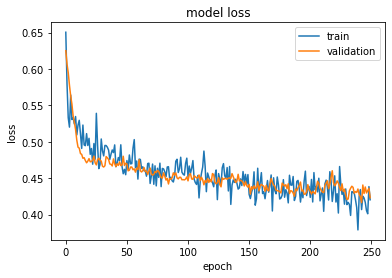

In [46]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [53]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 2 hidden layers, #Increase Dropout and BatchNomarlisation layers
# Powers of 2, Larger decrements (256-164-8)
# define the keras model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model = Sequential()

model.add(Dense(256, input_dim=4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(164, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=300, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/300
42/42 [==============================] - 2s 9ms/step - loss: 0.7247 - accuracy: 0.6231 - val_loss: 0.6482 - val_accuracy: 0.6409
Epoch 2/300
42/42 [==============================] - 0s 3ms/step - loss: 0.5935 - accuracy: 0.7234 - val_loss: 0.6356 - val_accuracy: 0.6318
Epoch 3/300
42/42 [==============================] - 0s 3ms/step - loss: 0.5191 - accuracy: 0.7416 - val_loss: 0.6204 - val_accuracy: 0.6455
Epoch 4/300
42/42 [==============================] - 0s 3ms/step - loss: 0.5446 - accuracy: 0.7325 - val_loss: 0.6027 - val_accuracy: 0.7000
Epoch 5/300
42/42 [==============================] - 0s 3ms/step - loss: 0.5534 - accuracy: 0.7325 - val_loss: 0.5878 - val_accuracy: 0.6864
Epoch 6/300
42/42 [==============================] - 0s 3ms/step - loss: 0.5335 - accuracy: 0.7204 - val_loss: 0.5729 - val_accuracy: 0.7227
Epoch 7/300
42/42 [==============================] - 0s 3ms/step - loss: 0.5454 - accuracy: 0.7416 - val_loss: 0.5542 - val_accuracy: 0.7409
Epoch 8/300
4

Epoch 59/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4748 - accuracy: 0.8040 - val_loss: 0.4602 - val_accuracy: 0.7727
Epoch 60/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4385 - accuracy: 0.8055 - val_loss: 0.4616 - val_accuracy: 0.7636
Epoch 61/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4520 - accuracy: 0.8191 - val_loss: 0.4644 - val_accuracy: 0.7500
Epoch 62/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4780 - accuracy: 0.7888 - val_loss: 0.4626 - val_accuracy: 0.7727
Epoch 63/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4642 - accuracy: 0.8024 - val_loss: 0.4649 - val_accuracy: 0.7636
Epoch 64/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4437 - accuracy: 0.8131 - val_loss: 0.4584 - val_accuracy: 0.7545
Epoch 65/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4600 - accuracy: 0.7903 - val_loss: 0.4645 - val_accuracy: 0.7682
Epoch 

42/42 [==============================] - 0s 4ms/step - loss: 0.4374 - accuracy: 0.8070 - val_loss: 0.4360 - val_accuracy: 0.7818
Epoch 174/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4480 - accuracy: 0.8176 - val_loss: 0.4334 - val_accuracy: 0.7727
Epoch 175/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4438 - accuracy: 0.8161 - val_loss: 0.4344 - val_accuracy: 0.7773
Epoch 176/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4249 - accuracy: 0.8298 - val_loss: 0.4373 - val_accuracy: 0.7591
Epoch 177/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4340 - accuracy: 0.8100 - val_loss: 0.4343 - val_accuracy: 0.7773
Epoch 178/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4176 - accuracy: 0.8146 - val_loss: 0.4381 - val_accuracy: 0.7864
Epoch 179/300
42/42 [==============================] - 0s 4ms/step - loss: 0.4541 - accuracy: 0.8055 - val_loss: 0.4496 - val_accuracy: 0.7636
Epoch 180/300

42/42 [==============================] - 0s 3ms/step - loss: 0.4386 - accuracy: 0.8161 - val_loss: 0.4275 - val_accuracy: 0.8091
Epoch 288/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4057 - accuracy: 0.8237 - val_loss: 0.4305 - val_accuracy: 0.8000
Epoch 289/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4278 - accuracy: 0.8283 - val_loss: 0.4359 - val_accuracy: 0.8045
Epoch 290/300
42/42 [==============================] - 0s 3ms/step - loss: 0.3999 - accuracy: 0.8465 - val_loss: 0.4265 - val_accuracy: 0.8000
Epoch 291/300
42/42 [==============================] - 0s 4ms/step - loss: 0.4172 - accuracy: 0.8267 - val_loss: 0.4304 - val_accuracy: 0.8045
Epoch 292/300
42/42 [==============================] - 0s 4ms/step - loss: 0.4091 - accuracy: 0.8161 - val_loss: 0.4362 - val_accuracy: 0.7864
Epoch 293/300
42/42 [==============================] - 0s 4ms/step - loss: 0.4153 - accuracy: 0.8222 - val_loss: 0.4312 - val_accuracy: 0.7909
Epoch 294/300

In [54]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 1ms/step - loss: 0.3198 - accuracy: 0.8891
Training Accuracy: 88.91
7/7 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8364
Validation Accuracy: 83.64


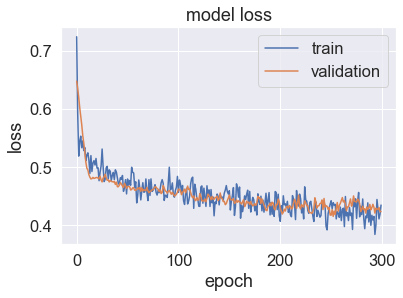

In [55]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [32]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 2 hidden layers, #Increase Dropout and BatchNomarlisation layers
# Powers of 2, Larger decrements (512-512-8)
# define the keras model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model = Sequential()

model.add(Dense(512, input_dim=4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=300, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/300
42/42 [==============================] - 2s 11ms/step - loss: 0.6573 - accuracy: 0.6641 - val_loss: 0.6158 - val_accuracy: 0.7000
Epoch 2/300
42/42 [==============================] - 0s 5ms/step - loss: 0.5217 - accuracy: 0.7371 - val_loss: 0.6112 - val_accuracy: 0.7045
Epoch 3/300
42/42 [==============================] - 0s 6ms/step - loss: 0.5258 - accuracy: 0.7401 - val_loss: 0.6016 - val_accuracy: 0.7227
Epoch 4/300
42/42 [==============================] - 0s 6ms/step - loss: 0.5516 - accuracy: 0.7508 - val_loss: 0.5866 - val_accuracy: 0.7227
Epoch 5/300
42/42 [==============================] - 0s 6ms/step - loss: 0.5311 - accuracy: 0.7675 - val_loss: 0.5875 - val_accuracy: 0.7364
Epoch 6/300
42/42 [==============================] - 0s 6ms/step - loss: 0.5292 - accuracy: 0.7416 - val_loss: 0.5715 - val_accuracy: 0.7409
Epoch 7/300
42/42 [==============================] - 0s 6ms/step - loss: 0.5335 - accuracy: 0.7538 - val_loss: 0.5487 - val_accuracy: 0.7364
Epoch 8/300


Epoch 59/300
42/42 [==============================] - 0s 6ms/step - loss: 0.4370 - accuracy: 0.8176 - val_loss: 0.4444 - val_accuracy: 0.7682
Epoch 60/300
42/42 [==============================] - 0s 6ms/step - loss: 0.4284 - accuracy: 0.8131 - val_loss: 0.4507 - val_accuracy: 0.7682
Epoch 61/300
42/42 [==============================] - 0s 6ms/step - loss: 0.4484 - accuracy: 0.8176 - val_loss: 0.4433 - val_accuracy: 0.7636
Epoch 62/300
42/42 [==============================] - 0s 6ms/step - loss: 0.4470 - accuracy: 0.8146 - val_loss: 0.4415 - val_accuracy: 0.7682
Epoch 63/300
42/42 [==============================] - 0s 6ms/step - loss: 0.4436 - accuracy: 0.8009 - val_loss: 0.4365 - val_accuracy: 0.7818
Epoch 64/300
42/42 [==============================] - 0s 6ms/step - loss: 0.4532 - accuracy: 0.8070 - val_loss: 0.4367 - val_accuracy: 0.7727
Epoch 65/300
42/42 [==============================] - 0s 6ms/step - loss: 0.4294 - accuracy: 0.8176 - val_loss: 0.4490 - val_accuracy: 0.7727
Epoch 

42/42 [==============================] - 0s 6ms/step - loss: 0.3899 - accuracy: 0.8465 - val_loss: 0.4206 - val_accuracy: 0.8136
Epoch 174/300
42/42 [==============================] - 0s 6ms/step - loss: 0.4412 - accuracy: 0.8207 - val_loss: 0.4348 - val_accuracy: 0.8045
Epoch 175/300
42/42 [==============================] - 0s 6ms/step - loss: 0.4177 - accuracy: 0.8176 - val_loss: 0.4411 - val_accuracy: 0.7773
Epoch 176/300
42/42 [==============================] - 0s 6ms/step - loss: 0.3876 - accuracy: 0.8435 - val_loss: 0.4353 - val_accuracy: 0.7909
Epoch 177/300
42/42 [==============================] - 0s 6ms/step - loss: 0.3867 - accuracy: 0.8191 - val_loss: 0.4350 - val_accuracy: 0.8091
Epoch 178/300
42/42 [==============================] - 0s 6ms/step - loss: 0.3879 - accuracy: 0.8222 - val_loss: 0.4354 - val_accuracy: 0.7955
Epoch 179/300
42/42 [==============================] - 0s 6ms/step - loss: 0.4033 - accuracy: 0.8283 - val_loss: 0.4429 - val_accuracy: 0.7909
Epoch 180/300

42/42 [==============================] - 0s 6ms/step - loss: 0.3877 - accuracy: 0.8298 - val_loss: 0.4352 - val_accuracy: 0.7864
Epoch 288/300
42/42 [==============================] - 0s 6ms/step - loss: 0.3833 - accuracy: 0.8556 - val_loss: 0.4362 - val_accuracy: 0.7955
Epoch 289/300
42/42 [==============================] - 0s 6ms/step - loss: 0.3912 - accuracy: 0.8252 - val_loss: 0.4220 - val_accuracy: 0.8273
Epoch 290/300
42/42 [==============================] - 0s 6ms/step - loss: 0.3931 - accuracy: 0.8511 - val_loss: 0.4232 - val_accuracy: 0.8045
Epoch 291/300
42/42 [==============================] - 0s 6ms/step - loss: 0.3868 - accuracy: 0.8374 - val_loss: 0.4430 - val_accuracy: 0.8045
Epoch 292/300
42/42 [==============================] - 0s 6ms/step - loss: 0.3725 - accuracy: 0.8450 - val_loss: 0.4374 - val_accuracy: 0.8136
Epoch 293/300
42/42 [==============================] - 0s 6ms/step - loss: 0.4130 - accuracy: 0.8207 - val_loss: 0.4341 - val_accuracy: 0.8091
Epoch 294/300

In [33]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 2ms/step - loss: 0.2754 - accuracy: 0.8997
Training Accuracy: 89.97
7/7 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.8045
Validation Accuracy: 80.45


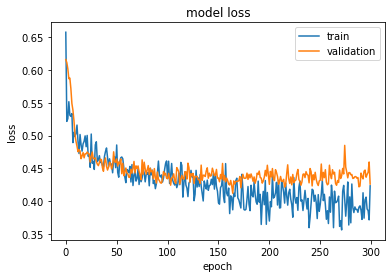

In [34]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [35]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 2 hidden layers, #Increase Dropout and BatchNomarlisation layers
# Powers of 2, Larger decrements (512-334-8)
# define the keras model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model = Sequential()

model.add(Dense(512, input_dim=4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(334, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=300, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/300
42/42 [==============================] - 2s 9ms/step - loss: 0.7082 - accuracy: 0.6322 - val_loss: 0.6236 - val_accuracy: 0.6864
Epoch 2/300
42/42 [==============================] - 0s 4ms/step - loss: 0.5329 - accuracy: 0.7447 - val_loss: 0.6232 - val_accuracy: 0.6727
Epoch 3/300
42/42 [==============================] - 0s 4ms/step - loss: 0.5213 - accuracy: 0.7477 - val_loss: 0.6166 - val_accuracy: 0.6727
Epoch 4/300
42/42 [==============================] - 0s 4ms/step - loss: 0.5676 - accuracy: 0.7249 - val_loss: 0.6015 - val_accuracy: 0.6864
Epoch 5/300
42/42 [==============================] - 0s 4ms/step - loss: 0.5202 - accuracy: 0.7629 - val_loss: 0.5894 - val_accuracy: 0.6955
Epoch 6/300
42/42 [==============================] - 0s 4ms/step - loss: 0.5514 - accuracy: 0.7371 - val_loss: 0.5745 - val_accuracy: 0.7318
Epoch 7/300
42/42 [==============================] - 0s 5ms/step - loss: 0.5371 - accuracy: 0.7568 - val_loss: 0.5556 - val_accuracy: 0.7318
Epoch 8/300
4

Epoch 59/300
42/42 [==============================] - 0s 5ms/step - loss: 0.4559 - accuracy: 0.7948 - val_loss: 0.4501 - val_accuracy: 0.7636
Epoch 60/300
42/42 [==============================] - 0s 4ms/step - loss: 0.4232 - accuracy: 0.8176 - val_loss: 0.4493 - val_accuracy: 0.7545
Epoch 61/300
42/42 [==============================] - 0s 5ms/step - loss: 0.4504 - accuracy: 0.7918 - val_loss: 0.4386 - val_accuracy: 0.7773
Epoch 62/300
42/42 [==============================] - 0s 4ms/step - loss: 0.4530 - accuracy: 0.7948 - val_loss: 0.4436 - val_accuracy: 0.7500
Epoch 63/300
42/42 [==============================] - 0s 4ms/step - loss: 0.4510 - accuracy: 0.8176 - val_loss: 0.4357 - val_accuracy: 0.7909
Epoch 64/300
42/42 [==============================] - 0s 4ms/step - loss: 0.4565 - accuracy: 0.8131 - val_loss: 0.4390 - val_accuracy: 0.7864
Epoch 65/300
42/42 [==============================] - 0s 4ms/step - loss: 0.4289 - accuracy: 0.8100 - val_loss: 0.4478 - val_accuracy: 0.7682
Epoch 

42/42 [==============================] - 0s 4ms/step - loss: 0.4010 - accuracy: 0.8450 - val_loss: 0.4402 - val_accuracy: 0.8000
Epoch 174/300
42/42 [==============================] - 0s 4ms/step - loss: 0.4251 - accuracy: 0.8283 - val_loss: 0.4384 - val_accuracy: 0.8045
Epoch 175/300
42/42 [==============================] - 0s 4ms/step - loss: 0.4227 - accuracy: 0.8222 - val_loss: 0.4440 - val_accuracy: 0.7864
Epoch 176/300
42/42 [==============================] - 0s 4ms/step - loss: 0.3962 - accuracy: 0.8267 - val_loss: 0.4433 - val_accuracy: 0.7909
Epoch 177/300
42/42 [==============================] - 0s 4ms/step - loss: 0.3878 - accuracy: 0.8283 - val_loss: 0.4433 - val_accuracy: 0.8045
Epoch 178/300
42/42 [==============================] - 0s 4ms/step - loss: 0.3954 - accuracy: 0.8207 - val_loss: 0.4588 - val_accuracy: 0.7818
Epoch 179/300
42/42 [==============================] - 0s 4ms/step - loss: 0.4161 - accuracy: 0.8298 - val_loss: 0.4468 - val_accuracy: 0.7773
Epoch 180/300

42/42 [==============================] - 0s 4ms/step - loss: 0.3917 - accuracy: 0.8389 - val_loss: 0.4384 - val_accuracy: 0.8091
Epoch 288/300
42/42 [==============================] - 0s 4ms/step - loss: 0.3864 - accuracy: 0.8480 - val_loss: 0.4279 - val_accuracy: 0.8136
Epoch 289/300
42/42 [==============================] - 0s 5ms/step - loss: 0.4054 - accuracy: 0.8404 - val_loss: 0.4248 - val_accuracy: 0.8091
Epoch 290/300
42/42 [==============================] - 0s 5ms/step - loss: 0.3892 - accuracy: 0.8374 - val_loss: 0.4176 - val_accuracy: 0.8045
Epoch 291/300
42/42 [==============================] - 0s 4ms/step - loss: 0.3906 - accuracy: 0.8556 - val_loss: 0.4371 - val_accuracy: 0.7909
Epoch 292/300
42/42 [==============================] - 0s 5ms/step - loss: 0.3764 - accuracy: 0.8404 - val_loss: 0.4292 - val_accuracy: 0.8182
Epoch 293/300
42/42 [==============================] - 0s 4ms/step - loss: 0.3920 - accuracy: 0.8465 - val_loss: 0.4360 - val_accuracy: 0.8091
Epoch 294/300

In [36]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 2ms/step - loss: 0.2819 - accuracy: 0.9027
Training Accuracy: 90.27
7/7 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.8136
Validation Accuracy: 81.36


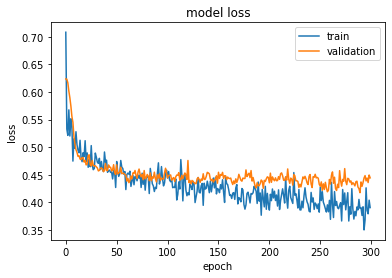

In [37]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()